In [1]:
import numpy as np
import matplotlib.pyplot as plt

#@title Plotting Functions

def plot_observed_vs_predicted(x, y, y_hat, theta_hat):
  """ Plot observed vs predicted data

  Args:
    x (ndarray): observed x values
    y (ndarray): observed y values
    y_hat (ndarray): predicted y values
    theta_hat (ndarray):
  """
  fig, ax = plt.subplots()
  ax.scatter(x, y, label='Observed')  # our data scatter plot
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model
  # plot residuals
  ymin = np.minimum(y, y_hat)
  ymax = np.maximum(y, y_hat)
  ax.vlines(x, ymin, ymax, 'g', alpha=0.5, label='Residuals')
  ax.set(
      title=fr"$\hat{{\theta}}$ = {theta_hat:0.2f}, MSE = {np.mean((y - y_hat)**2):.2f}",
      xlabel='x',
      ylabel='y'
  )
  ax.legend()

In [4]:
def get_exponent(pts_qtt, batch_size):
	return (np.log(pts_qtt/(batch_size * 2)) / np.log(2))

def get_operation_count(pts_qtt, batch_size):
	n = get_exponent(pts_qtt, batch_size)
	return (pow(2, n) * (B[batch_size - 2] + (n+1) * T[batch_size - 2])) + 1 * pts_qtt

def solve(pts_qtt):
	sol = list()
	for batch_size in [2, 3, 4, 5]:
		sol.append(get_operation_count(pts_qtt, batch_size))
	return sol

#operations for stack of size 100: [971.5784284662085, 942.1673866913685, 946.5784284662093, 968.2892142331045]
#operations for stack of size 500: [6599.33821349657, 6452.283004622365, 6474.338213496569, 6582.892142331041]


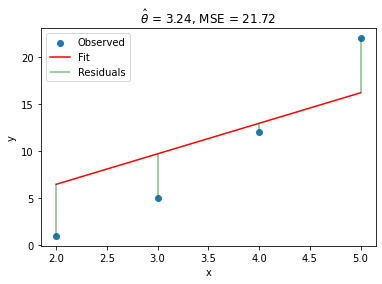

In [5]:
B = [1, 5, 12, 22]
T = [6, 9, 12, 15]

print(f'#operations for stack of size 100: {solve(100)}')
print(f'#operations for stack of size 500: {solve(500)}')

x = np.arange(2, 6)
theta_hat = (x.T @ B) / (x.T @ x)

plot_observed_vs_predicted(x, B, x * theta_hat, theta_hat)
